# Introduction

원하는 컨텐츠를 찾아나가는 접근 방법에는 검색 등의 방법이 있다. 검색은 원하는 키워드를 입력하여 그와 관련된 결과를 확인하는 방식이다. 원하는 컨텐츠가 키워드로 검색이 어려울 경우 만족할만한 결과를 얻기는 어렵다. 이를 이미지 검색을 통해서 대체해보고자 한다.

이미지 Dominant color를 K-means algorithm으로 추출하기

https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/


In [14]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

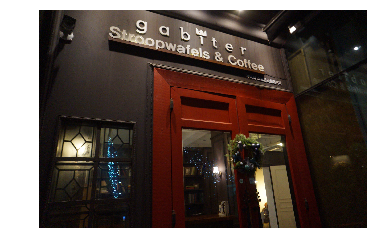

In [15]:
%matplotlib inline
img = cv2.imread("../Caffe_data/가비터/1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(np.asarray(img))

In [16]:
img = img.reshape((img.shape[0] * img.shape[1], 3))
clt = KMeans(n_clusters = 10)
clt.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

In [19]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

[0.08289284 0.30453875 0.04330325 0.01690588 0.06632253 0.19421773
 0.08031849 0.11605321 0.08084414 0.01460317]
[[ 73.84289437  62.6416899   51.30386618]
 [ 15.94488775   9.90480397   8.26494356]
 [134.04917246 116.94435617  97.38474843]
 [188.28090198 174.46593131 148.68579444]
 [108.2908113   27.57750599   9.6743817 ]
 [ 31.65666714  23.83158136  17.48994647]
 [105.79372981  88.753673    70.49941976]
 [ 48.49737482  41.15562834  34.65227257]
 [ 65.47618308  13.38875296   5.61179767]
 [234.80603067 229.50852747 212.11171729]]


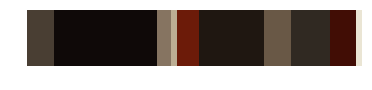

In [22]:
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
print(hist)
print(clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()